<a href="https://colab.research.google.com/github/Noah-Everett/ANNIE_Analysis/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append("/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination")
import rsim

Mounted at /content/gdrive


In [2]:
sim_0 = rsim.rsim( nRun = 0, nVerbose = 1 )

#===== rsim Settings =====#
          Version: v1_01_00
       Run number: 0
 Verbosity number: 1
     MCA channels: 1024
 MCA energy scale: 80
 MCA energy offset 0.1
     Diode height: 0.56
       Diode dEdX: 0.11
Diode gauss sigma: 0.009
#=========================#



In [3]:
sim_0.run( nTimePerSave = 60 * 60, nSaves = 8 * 7 * 24,
           initialAtoms = { "Ra226":1000000, "Rn222":0, "Po218":0, "At218":0, "Pb214":0, "Bi214":0, "Po214":0, "Tl210":0, "Pb210":0, "Bi210":0, "Po210":0 } )

#===== Run Settings =====#
Number of atoms: 1000000
     Total time: 4838400 seconds ===> 56.0 days
  Time per save: 3600 seconds ===> 1.0 hours
    Total saves: 1344
#========================#

#===== Isotope Lambdas =====#
{'Ra226': 1.3710679604013812e-11, 'Rn222': 2.0982180755947176e-06, 'Po218': 0.003729003553690259, 'At218': 0.46209812037329684, 'Pb214': 0.00043106167945270227, 'Bi214': 0.0005805252768508755, 'Po214': 4218.789899938803, 'Tl210': 0.008886502314871094, 'Pb210': 9.89392284938294e-10, 'Bi210': 1.6006657645723072e-06, 'Po210': 5.797636014942189e-08}
#===========================#


/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/rsim.py:273: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim( amount_min, amount_max )


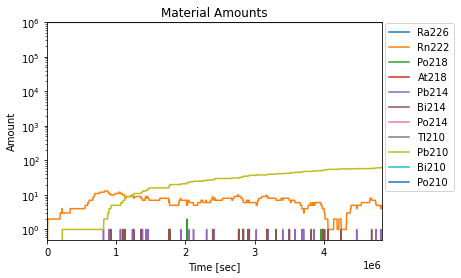

In [4]:
sim_0.plot_atoms( yScale = "log" )
# sim_0.plot_atoms( yScale = "linear" )

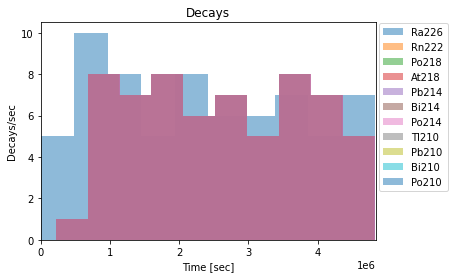

In [5]:
sim_0.plot_decays( yScale = "linear" )

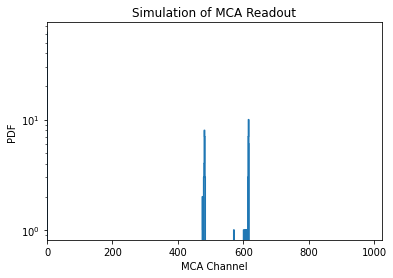

In [6]:
sim_0.plot_MCAOutput()

In [7]:
sim_0.save_MCAOutput( "/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/" )

In [8]:
!pip install lmfit
import pydan
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 4.3 MB/s 
     |████████████████████████████████| 98 kB 8.3 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=651c0cb3684a35e52989f9e43745850820d4e89aa728e79ec2d0bc32b32dbfa3
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


In [9]:
dan_0 = pydan.esc_run( run_path = "/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/v1_01_00_0/", verbose = False )

Sucessfully loaded 1345 spectrum into self.data
No run files specified.


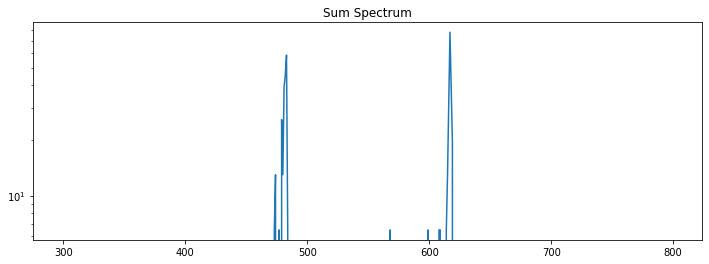

In [10]:
plt.figure( figsize = ( 12, 4 ) )
plt.plot( np.arange( 0, dan_0.nchan )[ 300 : 800 ], dan_0.data[ -1, 300 : 800 ] / sum( dan_0.ilivetime ) * 3600 * 24, '-', label = 'bgp' )
plt.title( "Sum Spectrum" )
plt.yscale( "log" )
BGP_cpd = dan_0.data[ -1, 300 : 800 ] / sum( dan_0.irealtime ) * 3600 * 24

(-1.0, 1.0)

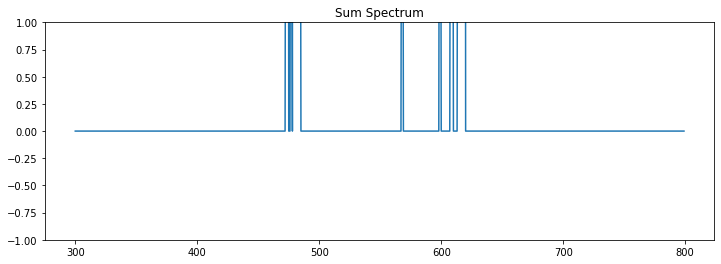

In [11]:
plt.figure( figsize = ( 12, 4 ) )
plt.plot( np.arange( 0, dan_0.nchan )[ 300 : 800 ], dan_0.data[ -1, 300 : 800 ] / sum( dan_0.ilivetime ) * 3600 * 24 - BGP_cpd, '-', label = 'cold' )
plt.title( "Sum Spectrum" )
plt.ylim( -1, 1 )

Setting Verbose = True
initial_find_peaks: [482, 618]
[5.301 6.002 7.687] [375 425 547]


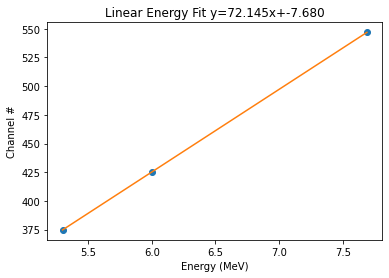

[72.14530928 -7.67980773] 0.08965269156885466


In [12]:
dan_1 = pydan.fit_peaks( dan_0, verbose = True )
dan_1.initial_find_peaks( threshold = 0.01 )
dan_1.linear_energy_fit_multipeak( [ 375, 425, 547 ],[ 'Po210', 'Po218', 'Po214' ] )

In [13]:
dan_1.alpha_list = [ "Po210", "Po218", "Po216", "Po214", "Po212" ]
dan_1.lmfit_peaks()
dan_1.lmfit_out

Recalibrated Energy Scale based on fit m=73.967 b=-17.868


/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/pydan.py:497: RuntimeWarning: invalid value encountered in true_divide
  Po210_mask[Po210_pdf/max(Po210_pdf)<self.mask_cut] = 0
/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/pydan.py:499: RuntimeWarning: invalid value encountered in true_divide
  Po215_mask[Po215_pdf/max(Po215_pdf)<self.mask_cut] = 0
/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/pydan.py:501: RuntimeWarning: invalid value encountered in true_divide
  Po218_mask[Po218_pdf/max(Po218_pdf)<self.mask_cut] = 0
/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/pydan.py:505: RuntimeWarning: invalid value encountered in true_divide
  Bi2111_mask[Bi2111_pdf/max(Bi2111_pdf)<self.mask_cut]=0
/content/gdrive/MyDrive/Students 2022/Noah/Code/Radon-Emination/pydan.py:506: RuntimeWarning: invalid value encountered in true_divide
  Bi2112_mask[Bi2112_pdf/max(Bi2112_pdf)<self.mask_cut]=0


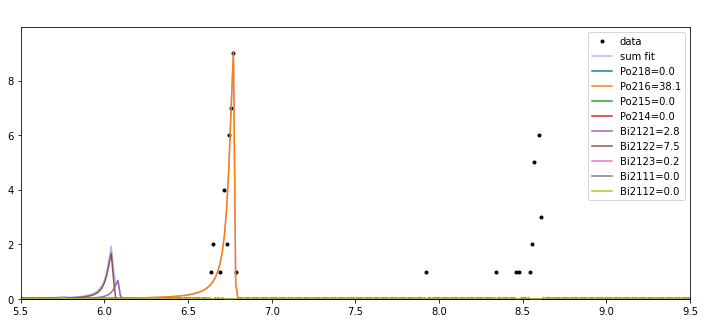

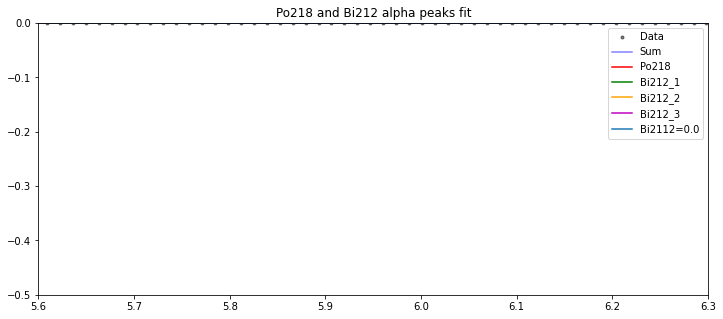

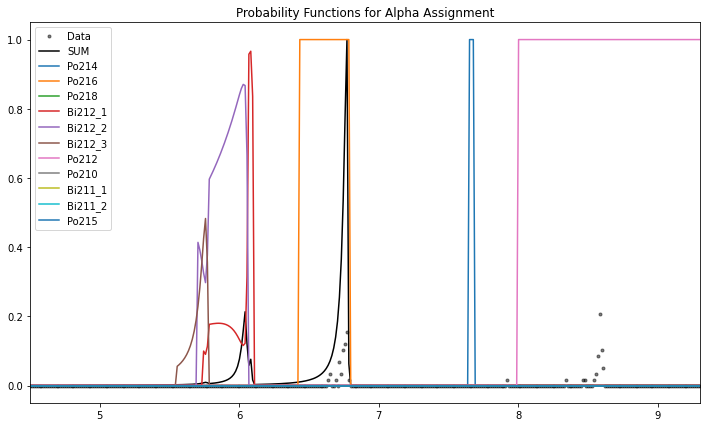

In [14]:
dan_1.make_lmfit_pdfs()

In [15]:
dan_1.compute_alpha_counts()

In [16]:
dan_2 = pydan.fit_chain( dan_1 )

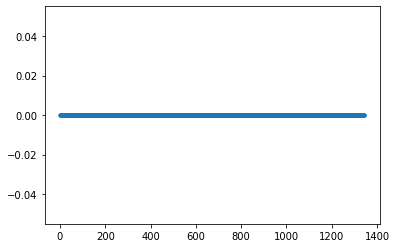

In [17]:
plt.plot( dan_2.alpha_cph[ 'Po214' ], '.' )